First of all, we need to choose export column in the input tables.
Here, we need Volume(unit) and SurfaceArea (um2). 

Step 1. Grab .csv files, convert it to .xlsx and upload into dataframe (df).

In [1]:
from IPython import get_ipython
get_ipython().magic('reset -sf') 

import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, ks_2samp


Function csv_to_xlsx convert all .csv files in folder to .xlsx

In [2]:
def csv_to_xlsx_clust():
    csv_search_string = '**/*GLT*.csv'
    csv_filepaths = glob.glob(csv_search_string)
    df = pd.DataFrame()
    for csv in csv_filepaths:
        out = csv.split('.')[0]+'.xlsx'
        df = pd.read_csv(csv, sep=';', decimal = ',', encoding='latin1',engine='python')
        df = df.to_excel(out, float_format="%.4f")
    return (df)
#csv_to_xlsx_clust()

Function file_extraction upload columns 2 and 5 from files in data folder and join it to df sue to 'outer join'.

In [3]:
def file_extraction(search_string): 
    filepaths = glob.glob(search_string) 
    df = pd.DataFrame()
    col_name_suffix = 1
    for find_files in filepaths:
        df = df.join (pd.read_excel(find_files, usecols=[2,5]), how='outer',lsuffix=col_name_suffix, )
        col_name_suffix +=1 
    return(df)

We apply file_extraction to extract all available data for each animal in control ('Контроль', ctrl) and epilepsy ('ЭС', SE) into separate dataframes (N1-N6), where N* - animal number

In [4]:
N1_clust_ctrl = file_extraction('**/N1*_ctrl_*_GLT.xlsx')
N2_clust_ctrl = file_extraction('**/N2*_ctrl_*_GLT.xlsx')
N3_clust_ctrl = file_extraction('**/N3*_ctrl_*_GLT.xlsx')
N4_clust_ctrl = file_extraction('**/N4*_ctrl_*_GLT.xlsx')
N5_clust_ctrl = file_extraction('**/N5*_ctrl_*_GLT.xlsx')
N6_clust_ctrl = file_extraction('**/N6_ctrl_*_GLT.xlsx') 

N1_clust_SE = file_extraction('**/N1*SE*_GLT.xlsx')
N2_clust_SE = file_extraction('**/N2*SE*_GLT.xlsx')
N3_clust_SE = file_extraction('**/N3*SE*_GLT.xlsx')
N4_clust_SE = file_extraction('**/N4*SE*_GLT.xlsx')
N5_clust_SE = file_extraction('**/N5*SE*_GLT.xlsx')
N6_clust_SE = file_extraction('**/N6*SE*_GLT.xlsx')

N1_clust_ctrl.head()

,Volume (unit)2,SurfaceArea2,Volume (unit)3,SurfaceArea3,Volume (unit)4,SurfaceArea4,Volume (unit),SurfaceArea
0,0.0788,1.4307,0.0931,1.5796,0.0859,1.7345,0.1719,2.6583
1,0.1504,2.5328,0.1182,2.0145,0.0465,1.0669,0.2077,2.5571
2,0.3366,3.3982,0.1038,1.6989,0.0609,1.3053,0.3222,4.0181
3,0.2685,3.8858,0.0967,1.6807,0.0716,1.2696,0.0573,0.9775
4,0.4296,5.0187,0.2685,3.4092,0.4010,4.5061,0.1217,2.0979


We can see descriptive statistics of data for each animal.

In [5]:
N1_clust_ctrl.describe(include='all')
#N2_clust_ctrl.describe(include='all')
#N3_clust_ctrl.describe(include='all')
#N4_clust_ctrl.describe(include='all')
#N5_clust_ctrl.describe(include='all')

#N1_clust_SE.describe(include='all')
#N2_clust_SE.describe(include='all')
#N3_clust_SE.describe(include='all')
#N4_clust_SE.describe(include='all')
#N5_clust_SE.describe(include='all')
#N6_clust_SE.describe(include='all')

,Volume (unit)2,SurfaceArea2,Volume (unit)3,SurfaceArea3,Volume (unit)4,SurfaceArea4,Volume (unit),SurfaceArea
count,3818.000000,3818.000000,3.901000e+03,3.901000e+03,3478.000000,3.478000e+03,3264.000000,3.264000e+03
mean,0.424083,4.567595,3.209620e+02,1.055825e+04,0.417585,8.057509e+03,0.456612,8.746411e+03
std,0.270616,2.123705,2.002293e+04,1.385439e+05,0.241879,1.277537e+05,0.268559,1.260922e+05
min,0.010700,0.333800,1.070000e-02,3.338000e-01,0.010700,3.338000e-01,0.014300,4.232000e-01
25%,0.225600,2.992800,2.041000e-01,2.736300e+00,0.240800,3.005925e+00,0.261400,3.235475e+00
50%,0.372400,4.350700,3.258000e-01,3.809700e+00,0.372400,4.121700e+00,0.411700,4.428600e+00
75%,0.572900,5.906700,5.013000e-01,5.185800e+00,0.551400,5.471725e+00,0.597900,5.812175e+00
max,2.842800,17.403700,1.250592e+06,2.902219e+06,1.689900,2.900513e+06,2.388100,2.900513e+06


We need to get the values of the clusters number for each animal. It is the number of rows in each column of the dataframe, except Null. Count() is perfect here, because it counts the number of all rows except Null

In [6]:
N1_num_clusters, N2_num_clusters, N3_num_clusters, N4_num_clusters, N5_num_clusters = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

N1_num_clusters ['Контроль'] = N1_clust_ctrl.count().iloc[::2]
N2_num_clusters ['Контроль'] = N2_clust_ctrl.count().iloc[::2]
N3_num_clusters ['Контроль'] = N3_clust_ctrl.count().iloc[::2]
N4_num_clusters ['Контроль'] = N4_clust_ctrl.count().iloc[::2]
N5_num_clusters ['Контроль'] = N5_clust_ctrl.count().iloc[::2]

N1_SE_num_clusters, N2_SE_num_clusters, N3_SE_num_clusters, N4_SE_num_clusters, N5_SE_num_clusters, N6_SE_num_clusters = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

N1_SE_num_clusters['ЭС'] = N1_clust_SE.count().iloc[::2]
N2_SE_num_clusters['ЭС'] = N2_clust_SE.count().iloc[::2]
N3_SE_num_clusters['ЭС'] = N3_clust_SE.count().iloc[::2]
N4_SE_num_clusters['ЭС'] = N4_clust_SE.count().iloc[::2]
N5_SE_num_clusters['ЭС'] = N5_clust_SE.count().iloc[::2]
N6_SE_num_clusters['ЭС'] = N6_clust_SE.count().iloc[::2]

Since we need to calculate the relative number of clusters of the reconstructed space volume, we add data on the total volume of space.

In [7]:
df_tot_vol = pd.read_excel('data/total_vol.xlsx')

The obtained values of the clusters number are put up in a separate dataframes.

In [8]:
values_ctrl = [N1_num_clusters,N2_num_clusters, N3_num_clusters,N4_num_clusters, N5_num_clusters] 
values_SE = [N1_SE_num_clusters,N2_SE_num_clusters, N3_SE_num_clusters, N4_SE_num_clusters, N5_SE_num_clusters,N6_SE_num_clusters] 
clust_num_ctrl, clust_num_SE  = pd.concat(values_ctrl), pd.concat(values_SE)

clust_num_ctrl['Totvol_clust_ctrl'] = df_tot_vol.iloc[:,0].values
clust_num_ctrl ['clusters_per_125_ctrl'] = (clust_num_ctrl['Контроль']*125)/clust_num_ctrl['Totvol_clust_ctrl']

clust_num_SE['Totvol_clust_SE'] = df_tot_vol.iloc[:len(clust_num_SE),1].values
clust_num_SE ['clusters_per_125_SE'] = (clust_num_SE['ЭС']*125)/clust_num_SE['Totvol_clust_SE']

all_clust_num,all_clust_num2  = pd.DataFrame(), pd.DataFrame()
all_clust_num ['Контроль'] = clust_num_ctrl.iloc[:,2].values
all_clust_num2 ['ЭС'] = clust_num_SE.iloc[:,2].values

all_clust_num.drop(all_clust_num [all_clust_num ['Контроль']> 63].index, inplace=True)#remove outliers

all_clust_num = all_clust_num.join(all_clust_num2, how='outer')

Step 2. Create graphs and calculate the necessary parameters of GLT-1 parameters

- Calculation of GLT-1 clusters number

We need find out possible differences in clusters number and probability destibution, volume fraction, surface area, surface-to-volume ratio (SVR)  

We create boxplot to compare these parameters between control and epilepsy

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Контроль v.s. ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=1.540e-07 U_stat=0.000e+00


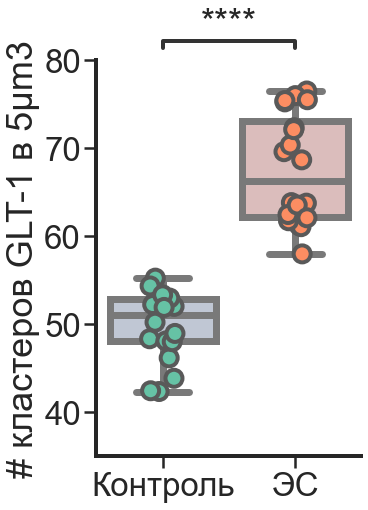

In [9]:
import matplotlib.ticker as ticker
from statannot import add_stat_annotation
def boxplot_graph(data, dots, fig_name, big_tick, ylim): 
    plt.figure(figsize=(6,8))
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(font_scale=1.5, style="ticks",context="poster", rc= custom_params)
    plot = sns.boxplot(data = data, palette="vlag", fliersize = 0, linewidth = 7)
    plot.spines['left'].set_linewidth(4)
    plot.spines['bottom'].set_linewidth(4)
    plot.yaxis.set_major_locator(ticker.MultipleLocator(big_tick))
    plot.set_ylabel(fig_name)
    plt.ylim(ylim)
    add_stat_annotation(plot, data=data,
                    box_pairs=[("Контроль", "ЭС")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=1, comparisons_correction=None, linewidth=4)
    fig_name = 'figs/' + fig_name + '.tif'
    plot = plot.get_figure()
    plt.tight_layout() 
    if dots == True:
        sns.stripplot(data=data,
              size=17, linewidth=4,palette = "Set2", jitter = True)
    plot.savefig(fig_name, dpi=1200)
boxplot_graph(all_clust_num, dots = True, fig_name = '# кластеров GLT-1 в 5µm3',big_tick = 10, ylim = [35, 80])

Then, we calculate median, 25 and 75 percentiles.

In [10]:
percentile_num_clusters = all_clust_num.quantile([0.25, 0.50 , 0.75])
print(percentile_num_clusters)

       Контроль         ЭС
0.25  48.048792  62.239983
0.50  51.075653  66.259594
0.75  52.818957  73.071731


Due to the nonparametric Mann-Whitney test, we check whether the clusters number after SE differs significantly in comparison to the control. The epilepsy group indeed differs from the control group by this parameter.

In [11]:
stat_clust_num, p_clust_num = mannwhitneyu(all_clust_num.iloc[:, 0].dropna(), all_clust_num.iloc[:, 1].dropna())
print('Statistics=%.3f, p=%.8f' % (stat_clust_num, p_clust_num))

Statistics=0.000, p=0.00000015


- Calculation of GLT-1 Cluster Volume Parameters

First of all, we load into one column all the available GLT-1 cluster volume values for each animal using the one_col_stack function, remove null values from our data and calculate the median, 25/75 percentiles for the GLT-1 cluster volume.

In [12]:
vol_clust_ctrl = pd.concat([N1_clust_ctrl.iloc[:,::2],N2_clust_ctrl.iloc[:,::2], N3_clust_ctrl.iloc[:,::2], N4_clust_ctrl.iloc[:,::2], N5_clust_ctrl.iloc[:,::2]], axis=1, ignore_index=True)
vol_clust_SE = pd.concat([N1_clust_SE.iloc[:,::2],N2_clust_SE.iloc[:,::2], N3_clust_SE.iloc[:,::2], N4_clust_SE.iloc[:,::2], N5_clust_SE.iloc[:,::2], N6_clust_SE.iloc[:,::2]], axis=1, ignore_index=True)

In [13]:
vol_clust_ctrl = pd.concat([N1_clust_ctrl.iloc[:,::2],N2_clust_ctrl.iloc[:,::2], N3_clust_ctrl.iloc[:,::2],
                             N4_clust_ctrl.iloc[:,::2], N5_clust_ctrl.iloc[:,::2]], axis=1, ignore_index=True)
vol_clust_SE = pd.concat([N1_clust_SE.iloc[:,::2],N2_clust_SE.iloc[:,::2], N3_clust_SE.iloc[:,::2],
                            N4_clust_SE.iloc[:,::2], N5_clust_SE.iloc[:,::2], N6_clust_SE.iloc[:,::2]], axis=1, ignore_index=True)

def one_col_stack (dataset):
    df = pd.DataFrame()
    for i in range(dataset.shape[1]):
        df = pd.concat([df, pd.Series(dataset.iloc[:,i].values)],axis=0)
    return(df)

vol_clust_ctrl= one_col_stack (vol_clust_ctrl)
vol_clust_SE = one_col_stack (vol_clust_SE)

vol_clust_ctrl.reset_index(inplace=True, drop=True)
vol_clust_SE.reset_index(inplace=True, drop=True)


all_vol_clust = pd.DataFrame()

all_vol_clust = vol_clust_ctrl.copy()
all_vol_clust = all_vol_clust.join(vol_clust_SE, how='outer',lsuffix = '_CTRL', rsuffix= '_SE')
all_vol_clust.rename(columns = {'0_CTRL' : 'Контроль', '0_SE' : 'ЭС'}, inplace = True)

all_vol_clust.loc[all_vol_clust['Контроль'].isnull()] = 0
all_vol_clust.loc[all_vol_clust['ЭС'].isnull()] = 0
all_vol_clust.sort_values(by=['Контроль', 'ЭС'], ascending=True, inplace=True)
all_vol_clust.drop(all_vol_clust[all_vol_clust['Контроль'] == 0].index, inplace=True)
all_vol_clust.drop(all_vol_clust[all_vol_clust['Контроль']> 1.7].index, inplace=True)#удалим выбросы
all_vol_clust.drop(all_vol_clust[all_vol_clust['ЭС']> 1.7].index, inplace=True)#удалим выбросы
all_vol_clust = all_vol_clust.reset_index(drop=True)


In [14]:
percentile_vol_clusters = all_vol_clust.quantile([0.25, 0.50 , 0.75])
print(percentile_vol_clusters)
stat_vol_clust, p_vol_clust = mannwhitneyu(all_vol_clust.iloc[:, 0], all_vol_clust.iloc[:, 1])
print()
print('Statistics=%.3f, p=%.10f' % (stat_vol_clust, p_vol_clust))

      Контроль     ЭС
0.25    0.2256  0.197
0.50    0.3795  0.339
0.75    0.5872  0.523

Statistics=1024976163.000, p=0.0000000000


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Контроль v.s. ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=4.810e-132 U_stat=1.025e+09


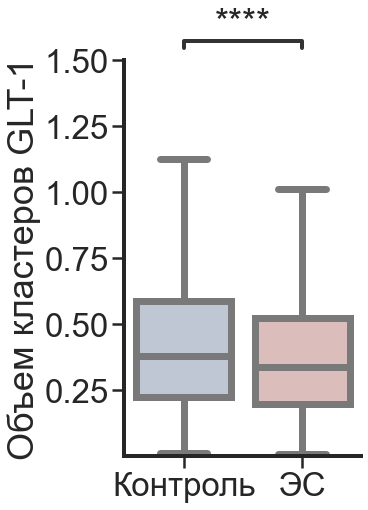

In [15]:
boxplot_graph(all_vol_clust , dots = False, fig_name = 'Объем кластеров GLT-1', big_tick = 0.25, ylim = [0.000001, 1.5])

We create a probability distribution of different size clusters.

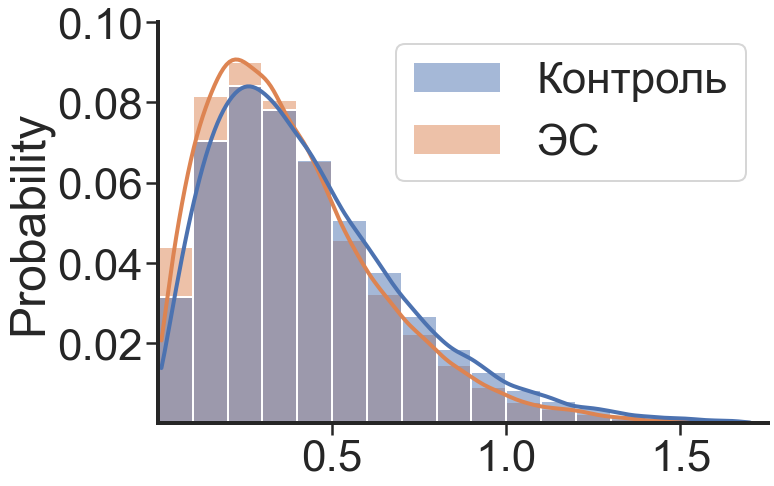

In [16]:
plt.figure(figsize=(12, 8)) # меняет размер графика
sns.set_theme(font_scale=2, style="ticks",context="poster")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
fg = sns.histplot(all_vol_clust,stat='probability',binwidth= 0.1, kde = True, binrange= [0,2],line_kws=dict(linewidth=4))
sns.despine()
fg.spines['left'].set_linewidth(4)
fg.spines['bottom'].set_linewidth(4)
fg.yaxis.set_major_locator(ticker.MultipleLocator(0.02))
fg.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.ylim([0.0001, 0.1])
plt.xlim([0.0001, 1.75])
plt.tight_layout() 

plt.savefig('figs/вероятностное распределение кластеров с разным объемом.tiff')

We apply the Kolmagorov-Smirnov test to evaluate whether these distributions belong to the same distribution. We find out that the probabilities are distributed differently.

In [17]:
stat_ks_test, p_ks_test = ks_2samp(all_vol_clust.iloc[:, 0], all_vol_clust.iloc[:, 1])

print('Statistics=%.3f, p=%.100f' % (stat_ks_test, p_ks_test))

Statistics=0.070, p=0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000128408747


- Calculation of GLT-1 volume fraction (vf)

Then, we create graphs and calculate the experimental parameters for GLT-1 volume fraction (vf)

In [18]:
N1_ctrl_vf_clust, N2_ctrl_vf_clust, N3_ctrl_vf_clust, N4_ctrl_vf_clust, N5_ctrl_vf_clust = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

N1_clust_ctrl.drop(N1_clust_ctrl[N1_clust_ctrl.iloc[:, 2]> 5000].index, inplace=True) #удалим выбросы

N1_ctrl_vf_clust ['Контроль'] = N1_clust_ctrl.sum().iloc[::2]
N2_ctrl_vf_clust ['Контроль'] = N2_clust_ctrl.sum().iloc[::2]
N3_ctrl_vf_clust ['Контроль'] = N3_clust_ctrl.sum().iloc[::2]
N4_ctrl_vf_clust ['Контроль'] = N4_clust_ctrl.sum().iloc[::2]
N5_ctrl_vf_clust ['Контроль'] = N5_clust_ctrl.sum().iloc[::2]

N1_SE_vf_clust, N2_SE_vf_clust, N3_SE_vf_clust, N4_SE_vf_clust, N5_SE_vf_clust, N6_SE_vf_clust = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

N1_SE_vf_clust['ЭС'] = N1_clust_SE.sum().iloc[::2]
N2_SE_vf_clust['ЭС'] = N2_clust_SE.sum().iloc[::2]
N3_SE_vf_clust['ЭС'] = N3_clust_SE.sum().iloc[::2]
N4_SE_vf_clust['ЭС'] = N4_clust_SE.sum().iloc[::2]
N5_SE_vf_clust['ЭС'] = N5_clust_SE.sum().iloc[::2]
N6_SE_vf_clust['ЭС'] = N6_clust_SE.sum().iloc[::2]

vf_ctrl_clust_l = [N1_ctrl_vf_clust, N2_ctrl_vf_clust, N3_ctrl_vf_clust, N4_ctrl_vf_clust, N5_ctrl_vf_clust]
vvf_SE_clust_l = [N1_SE_vf_clust, N2_SE_vf_clust, N3_SE_vf_clust, N4_SE_vf_clust, N5_SE_vf_clust, N6_SE_vf_clust]

all_vf_clust_ctrl = pd.concat(vf_ctrl_clust_l)
all_vf_clust_SE = pd.concat(vvf_SE_clust_l)

In [19]:
all_clust_vf = pd.DataFrame()
all_clust_vf['Контроль'] = all_vf_clust_ctrl.iloc[:,0].values/df_tot_vol.iloc[:,0].values
all_clust_vf.drop(all_clust_vf[all_clust_vf['Контроль']> 0.25].index, inplace=True)#удалим выбросы

all_clust_vf= all_clust_vf.join(pd.DataFrame(all_vf_clust_SE.iloc[:,0].values/df_tot_vol.iloc[:len(all_vf_clust_SE),1].values), how='outer')
all_clust_vf.rename(columns = {0 : 'ЭС'}, inplace = True)

In [20]:
percentile_vf_clust = all_clust_vf.quantile([0.25, 0.50 , 0.75])
print(percentile_vf_clust)
stat_vf_clust, p_vf_clust = mannwhitneyu(all_clust_vf.iloc[:, 0].dropna(), all_clust_vf.iloc[:, 1].dropna())
print()
print('Statistics=%.3f, p=%.3f' % (stat_vf_clust, p_vf_clust))

      Контроль        ЭС
0.25  0.176345  0.200951
0.50  0.194959  0.226530
0.75  0.203435  0.254161

Statistics=89.000, p=0.001


Построим графики для volume fraction

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Контроль v.s. ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=1.014e-03 U_stat=8.900e+01


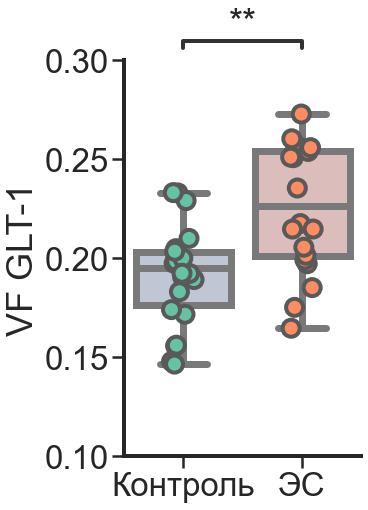

In [21]:
boxplot_graph(all_clust_vf , dots = True, fig_name = 'VF GLT-1', big_tick = 0.05, ylim = [0.1, 0.3])

- Calculation of GLT-1 clusters surface area

In [22]:
N1_ctrl_surf_clust, N2_ctrl_surf_clust, N3_ctrl_surf_clust, N4_ctrl_surf_clust, N5_ctrl_surf_clust = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

N1_ctrl_surf_clust = N1_clust_ctrl.median().iloc[1::2]
N2_ctrl_surf_clust = N2_clust_ctrl.median().iloc[1::2]
N3_ctrl_surf_clust = N3_clust_ctrl.median().iloc[1::2]
N4_ctrl_surf_clust = N4_clust_ctrl.median().iloc[1::2]
N5_ctrl_surf_clust = N5_clust_ctrl.median().iloc[1::2]

N1_SE_surf_clust, N2_SE_surf_clust, N3_SE_surf_clust, N4_SE_surf_clust, N5_SE_surf_clust, N6_SE_surf_clust  = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

N1_SE_surf_clust = N1_clust_SE.median().iloc[1::2]
N2_SE_surf_clust = N2_clust_SE.median().iloc[1::2]
N3_SE_surf_clust = N3_clust_SE.median().iloc[1::2]
N4_SE_surf_clust = N4_clust_SE.median().iloc[1::2]
N5_SE_surf_clust = N5_clust_SE.median().iloc[1::2]
N6_SE_surf_clust = N6_clust_SE.median().iloc[1::2]

full_vol_ctrl_clust_l = [N1_ctrl_surf_clust, N2_ctrl_surf_clust, N3_ctrl_surf_clust, N4_ctrl_surf_clust, N5_ctrl_surf_clust]
full_vol_SE_clust_l = [N1_SE_surf_clust, N2_SE_surf_clust, N3_SE_surf_clust, N4_SE_surf_clust, N5_SE_surf_clust, N6_SE_surf_clust ]

all_surf_clust_ctrl = pd.concat(full_vol_ctrl_clust_l)
all_surf_clust_SE = pd.concat(full_vol_SE_clust_l)

all_surf_clust = pd.DataFrame()
all_surf_clust ['Контроль'] = (all_surf_clust_ctrl.values/df_tot_vol.iloc[:,0].values)*100
all_surf_clust= all_surf_clust.join(pd.DataFrame((all_surf_clust_SE.values/(df_tot_vol.iloc[:len(df_tot_vol),1]).dropna().values)*100), how='outer')
all_surf_clust.rename(columns = {0 : 'ЭС'}, inplace = True)


In [23]:
percentile_surf_clust = all_surf_clust.quantile([0.25, 0.50 , 0.75])
print(percentile_surf_clust)
stat_surf_clust, p_surf_clust = mannwhitneyu(all_surf_clust.iloc[:, 0], all_surf_clust.iloc[:, 1].dropna())
print()
print('Statistics=%.3f, p=%.3f' % (stat_surf_clust, p_surf_clust))

      Контроль        ЭС
0.25  0.062459  0.063699
0.50  0.068943  0.076149
0.75  0.070917  0.079112

Statistics=110.000, p=0.004


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Контроль v.s. ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=3.617e-03 U_stat=1.100e+02


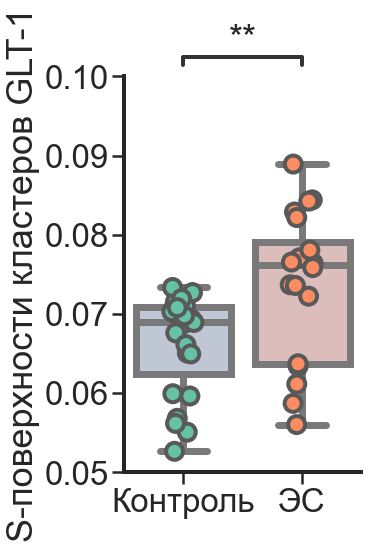

In [24]:
boxplot_graph(all_surf_clust, dots = True, fig_name= 'S-поверхности кластеров GLT-1', big_tick = 0.01, ylim = [0.05, 0.1])

- Calculation of GLT-1 clusters surface-to-volume ratio (svr)

In [25]:
svr = pd.DataFrame((all_surf_clust_ctrl.iloc[:1].values/all_vf_clust_ctrl.values) * 100)
svr.rename(columns= {0: 'Контроль'}, inplace = True)
svr.drop(svr[svr['Контроль']> 0.45].index, inplace=True) #удалим выбросы

svr = svr.join(pd.DataFrame((all_surf_clust_SE.iloc[:1].values/all_vf_clust_SE.values) * 100))
svr.rename(columns= {0: 'ЭС'}, inplace = True)

In [26]:
percentile_svr = svr.quantile([0.25, 0.50 , 0.75])
print(percentile_svr)
stat_svr, p_svr = mannwhitneyu(svr.iloc[:, 0], svr.iloc[:, 1].dropna())
print()
print('Statistics=%.3f, p=%.6f' % (stat_svr, p_svr))

      Контроль        ЭС
0.25  0.335095  0.223116
0.50  0.346810  0.259682
0.75  0.363728  0.292147

Statistics=352.000, p=0.000005


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Контроль v.s. ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=4.696e-06 U_stat=3.520e+02


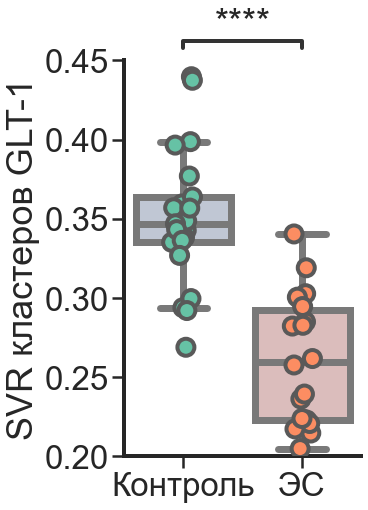

In [27]:
boxplot_graph(svr, dots = True, fig_name= 'SVR кластеров GLT-1', big_tick = 0.05, ylim = [0.2, 0.45])

Step 3. GS calculation

Since GS does not aggregates in clusters, we consider only the volume of the fraction (VF).

We repeat the procedures for converting and extracting data into a dataframe as previously described.

In [28]:
def csv_to_xlsx_cell():
    csv_search_string = '**/*GS*.csv'
    csv_filepaths = glob.glob(csv_search_string)
    df = pd.DataFrame()
    for csv in csv_filepaths:
        out = csv.split('.')[0]+'.xlsx'
        df = pd.read_csv(csv, sep=',', decimal = '.', encoding='latin1',engine='python')
        df = df.to_excel(out, float_format="%.4f")
    return (df)
#csv_to_xlsx_cell()

In [29]:
N1_cell_vol_ctrl = file_extraction('**/N1*_ctrl_*_GS.xlsx').sum().iloc[::2]
N2_cell_vol_ctrl = file_extraction('**/N2*_ctrl_*_GS.xlsx').sum().iloc[::2]
N3_cell_vol_ctrl = file_extraction('**/N3*_ctrl_*_GS.xlsx').sum().iloc[::2]
N4_cell_vol_ctrl = file_extraction('**/N4*_ctrl_*_GS.xlsx').sum().iloc[::2]
N5_cell_vol_ctrl = file_extraction('**/N5*_ctrl_*_GS.xlsx').sum().iloc[::2]

N1_cell_vol_SE = file_extraction('**/N1*SE*_GS.xlsx').sum().iloc[::2]
N2_cell_vol_SE = file_extraction('**/N2*SE*_GS.xlsx').sum().iloc[::2]
N3_cell_vol_SE = file_extraction('**/N3*SE*_GS.xlsx').sum().iloc[::2]
N4_cell_vol_SE = file_extraction('**/N4*SE*_GS.xlsx').sum().iloc[::2]
N5_cell_vol_SE = file_extraction('**/N5*SE*_GS.xlsx').sum().iloc[::2]
N6_cell_vol_SE = file_extraction('**/N6*SE*_GS.xlsx').sum().iloc[::2]

In [30]:
all_cell_vol_ctrl = pd.concat([N1_cell_vol_ctrl,N2_cell_vol_ctrl,N3_cell_vol_ctrl,N4_cell_vol_ctrl, N5_cell_vol_ctrl ])
all_cell_vol_SE = pd.concat([N1_cell_vol_SE,N2_cell_vol_SE,N3_cell_vol_SE,N4_cell_vol_SE,N5_cell_vol_SE,N6_cell_vol_SE])

all_cell_vol = pd.DataFrame()
all_cell_vol ['Контроль'] = (all_cell_vol_ctrl/df_tot_vol.iloc[:, 2].values)
all_cell_vol.reset_index(inplace=True, drop=True)
all_cell_vol = all_cell_vol.join(pd.DataFrame((all_cell_vol_SE.values/df_tot_vol.iloc[:, 3].dropna().values)), how= 'outer')
all_cell_vol.rename(columns = {0 : 'ЭС'}, inplace = True)

all_cell_vol.drop(all_cell_vol[all_cell_vol['ЭС']> 0.5].index, inplace=True)#удалим выбросы

In [31]:
percentile_cell_vol = all_cell_vol.quantile([0.25, 0.50 , 0.75])
print(percentile_cell_vol)
stat_cell_vol, p_cell_vol = mannwhitneyu(all_cell_vol.iloc[:, 0], all_cell_vol.iloc[:, 1].dropna())
print()
print('Statistics=%.3f, p=%.4f' % (stat_cell_vol, p_cell_vol))

      Контроль        ЭС
0.25  0.238236  0.116056
0.50  0.296535  0.136516
0.75  0.391276  0.202320

Statistics=295.000, p=0.0001


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Контроль v.s. ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=1.481e-04 U_stat=2.950e+02


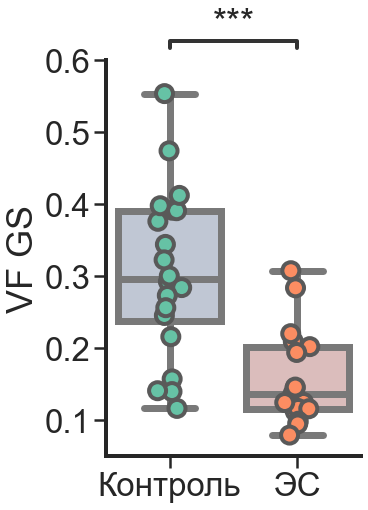

In [32]:
boxplot_graph(all_cell_vol, dots = True, fig_name= 'VF GS', big_tick = 0.1, ylim = [0.05, 0.6])

Step 4. Output results

In order to put all the measured parameters into one table, we combine all the data by percentiles and statistical criteria values into separate dataframes

In [33]:
def df_perc_stack (df_list,name_list):
    df = pd.DataFrame()
    
    for i in range (len(name_list)):
        name_id = name_list[i]
        index = pd.MultiIndex.from_product([[name_id ], [0.25, 0.50, 0.75]], 
                                                    names = ['Type', 'Percintile'])
        if i==0:
            df = pd.DataFrame(index=index, data=df_list[0].values,
                                            columns=['Контроль','ЭС'])
        else:
            df = pd.concat([df, pd.DataFrame(index=index, data=df_list[i].values,
                                            columns=['Контроль','ЭС'])])
    return df

perc_list = [percentile_cell_vol, percentile_num_clusters, percentile_surf_clust, percentile_svr, percentile_vf_clust, percentile_vol_clusters ]
perc_name_list = ['gs_vol','num_clust', 'surf_clust', 'svr_glt', 'vf_clust', 'vol_clusters']

perc_table_final = df_perc_stack (perc_list,perc_name_list)

In [34]:
def df_stat_stack(df_p_list, df_stat_list, name_list):
    df = pd.DataFrame()
    for i in range (len(name_list)):
        name_id = name_list[i]
        index = pd.MultiIndex.from_product([[name_id ],['P-val', 'MW(U)']], 
                                                    names = ['Type', 'Stats'])
        if i==0:
            df = pd.DataFrame(index=index, data=[df_p_list[0], df_stat_list[0]],
                                            columns=['Value'])
        else:
            df = pd.concat([df, pd.DataFrame(index=index, data=[df_p_list[i], df_stat_list[i]],
                                            columns=['Value'])])
    return(df)

df_p_list = [p_cell_vol, p_clust_num, p_ks_test, p_surf_clust, p_svr, p_vf_clust, p_vol_clust]
name_p_list = ['p_cell_vol', 'p_clust_num',  'p_ks_test', 'p_surf_clust', 'p_svr', 'p_vf_clust', 'p_vol_clust']
df_stat_list = [stat_cell_vol, stat_clust_num, stat_ks_test,   stat_surf_clust, stat_svr, stat_vf_clust, stat_vol_clust]

stat_table_final = df_stat_stack(df_p_list,df_stat_list, name_p_list)

Save these dataframes to excel file

In [35]:
with pd.ExcelWriter('output_table/final_out_gs_glt.xlsx') as writer:  
    perc_table_final.to_excel(writer, sheet_name='Percentiles', float_format="%.2f")
    stat_table_final.to_excel(writer, sheet_name='P-val, MW(U)', float_format="%.10f")

In [36]:
perc_table_final
stat_table_final

Value
Type         Stats               
p_cell_vol   P-val   1.480759e-04
             MW(U)   2.950000e+02
p_clust_num  P-val   1.539843e-07
             MW(U)   0.000000e+00
p_ks_test    P-val   1.284087e-92
             MW(U)   7.001480e-02
p_surf_clust P-val   3.617366e-03
             MW(U)   1.100000e+02
p_svr        P-val   4.696247e-06
             MW(U)   3.520000e+02
p_vf_clust   P-val   1.014219e-03
             MW(U)   8.900000e+01
p_vol_clust  P-val  4.809810e-132
             MW(U)   1.024976e+09

Profit!